In [ ]:
AIML HACKATHON Time Series Forecasting


In [3]:

import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/Air_Traffic_Passenger_Statistics.csv"

data = pd.read_csv(file_path)

print(data.head())


   index  Activity Period Operating Airline Operating Airline IATA Code  \
0      0           200507      ATA Airlines                          TZ   
1      1           200507      ATA Airlines                          TZ   
2      2           200507      ATA Airlines                          TZ   
3      3           200507       Air Canada                           AC   
4      4           200507       Air Canada                           AC   

  Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0      ATA Airlines                          TZ       Domestic         US   
1      ATA Airlines                          TZ       Domestic         US   
2      ATA Airlines                          TZ       Domestic         US   
3       Air Canada                           AC  International     Canada   
4       Air Canada                           AC  International     Canada   

  Activity Type Code Price Category Code    Terminal Boarding Area  \
0           Depl

we will be checking empty values in the data

In [4]:

print(data.info())
print(data.isnull().sum())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

Data Cleaning

Operating Airline IATA Code has 54 missing values and Published Airline IATA Code also have 54 missing values

In [5]:
missing_operating_airline = data[data['Operating Airline IATA Code'].isnull()]
missing_published_airline = data[data['Published Airline IATA Code'].isnull()]

# Print the rows with missing values
print("Rows with missing Operating Airline IATA Code:")
print(missing_operating_airline)

print("\nRows with missing Published Airline IATA Code:")
print(missing_published_airline)


Rows with missing Operating Airline IATA Code:
       index  Activity Period Operating Airline Operating Airline IATA Code  \
148      148           200508    Boeing Company                         NaN   
6814    6814           201005         Servisair                         NaN   
6815    6815           201005         Servisair                         NaN   
6925    6925           201006  Pacific Aviation                         NaN   
6926    6926           201006  Pacific Aviation                         NaN   
7173    7173           201008         Servisair                         NaN   
7174    7174           201008         Servisair                         NaN   
7747    7747           201101         Servisair                         NaN   
7748    7748           201101         Servisair                         NaN   
7972    7972           201103         Servisair                         NaN   
7973    7973           201103         Servisair                         NaN   
8327 

In [6]:
data['Operating Airline IATA Code'].fillna('Unknown', inplace=True)
data['Published Airline IATA Code'].fillna('Unknown', inplace=True)

print(data.isnull().sum())

index                          0
Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64


<ipython-input-6-3b17d5b636cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Operating Airline IATA Code'].fillna('Unknown', inplace=True)
<ipython-input-6-3b17d5b636cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

the year format is wrong (YYYYMM) we have to change it (YYYY-MM)

In [7]:
# Convert 'Activity Period' to string if it is numeric
data['Activity Period'] = data['Activity Period'].astype(str)

# Convert to datetime using the correct format
data['Activity Period'] = pd.to_datetime(data['Activity Period'], format='%Y%m', errors='coerce')

# Format the dates as 'dd-mm-yyyy'
data['Activity Period'] = data['Activity Period'].dt.strftime('%d-%m-%Y')

# Verify the conversion
print(data[['Activity Period']].head())


  Activity Period
0      01-07-2005
1      01-07-2005
2      01-07-2005
3      01-07-2005
4      01-07-2005


standardise column name

In [8]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Check the new column names
print(data.columns)

Index(['index', 'activity_period', 'operating_airline',
       'operating_airline_iata_code', 'published_airline',
       'published_airline_iata_code', 'geo_summary', 'geo_region',
       'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area', 'passenger_count', 'adjusted_activity_type_code',
       'adjusted_passenger_count', 'year', 'month'],
      dtype='object')


agregate data

In [9]:
# Aggregate adjusted passenger count by 'activity_period'
time_series_data = data.groupby('activity_period')['adjusted_passenger_count'].sum().reset_index()

# Sort the data by date
time_series_data = time_series_data.sort_values(by='activity_period')

# Display the first few rows of the aggregated time series data
print(time_series_data.head())


  activity_period  adjusted_passenger_count
0      01-01-2006                   2471712
1      01-01-2007                   2527036
2      01-01-2008                   2685375
3      01-01-2009                   2654860
4      01-01-2010                   2796566


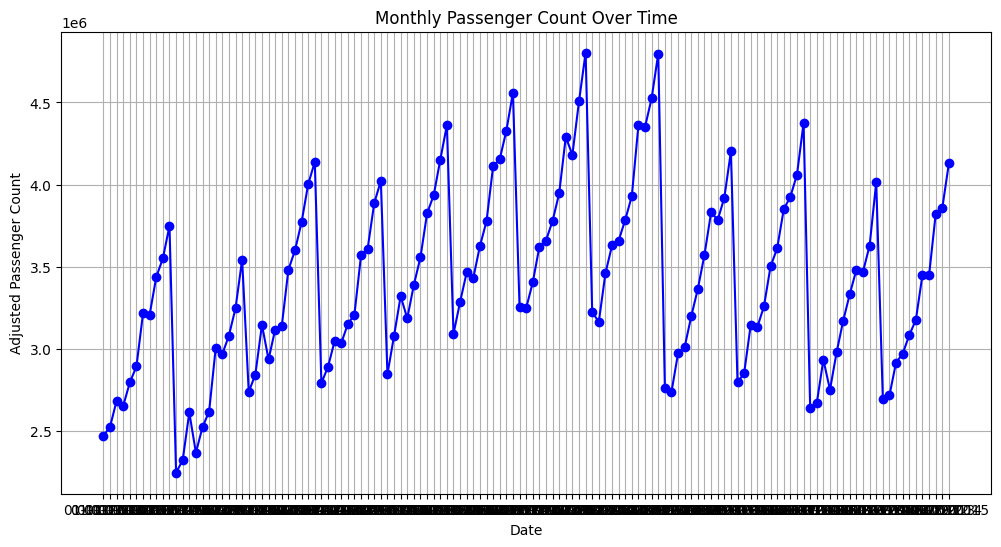

In [10]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['activity_period'], time_series_data['adjusted_passenger_count'], marker='o', color='b')
plt.title('Monthly Passenger Count Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Passenger Count')
plt.grid()
plt.show()


starting with time series analysis with LTSM to handle sequential data

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Extract the passenger count values
values = time_series_data['adjusted_passenger_count'].values.reshape(-1, 1)

# Scale the values to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
print("Scaled values:", scaled_values[:5])


Scaled values: [[0.08784405]
 [0.10949578]
 [0.17146373]
 [0.1595213 ]
 [0.21497971]]


sequence for LTSM

In [12]:
import numpy as np

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 12 months)
sequence_length = 12

# Create input-output sequences
X, y = create_sequences(scaled_values, sequence_length)

# Print the shapes of the input and output
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (117, 12, 1)
Shape of y: (117, 1)


Split the Data into Training and Testing Sets

In [13]:
# Split the data into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (93, 12, 1)
Testing set size: (24, 12, 1)


We’ll use TensorFlow/Keras to build a simple LSTM network

In [14]:
pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)




SyntaxError: invalid syntax (<ipython-input-17-443de7b7776c>, line 3)

In [ ]:
pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(12, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

train the model

In [16]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.2809 - val_loss: 0.1850
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2394 - val_loss: 0.1622
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2165 - val_loss: 0.1391
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1692 - val_loss: 0.1129
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1358 - val_loss: 0.0848
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1055 - val_loss: 0.0575
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0614 - val_loss: 0.0407
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0403 - val_loss: 0.0545
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0499 - val_loss: 0.0668
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0500 - val_loss: 0.0509
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0434 - val_loss: 0.0416
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0332 - val_loss: 0.0410


evaluate and predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


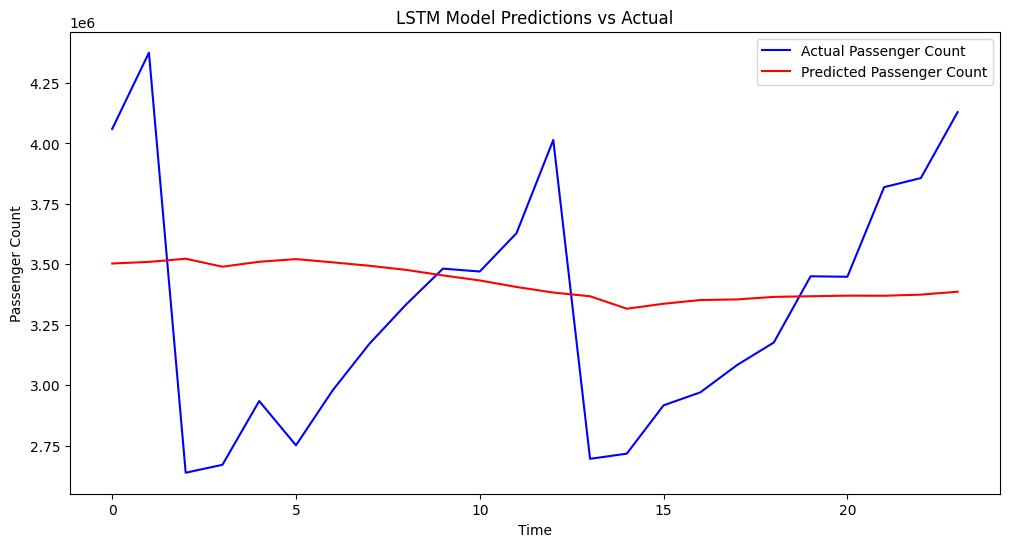

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Passenger Count', color='blue')
plt.plot(y_pred_original, label='Predicted Passenger Count', color='red')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


valuate Model Performance (Using Metrics)
Calculate key evaluation metrics:

MAE (Mean Absolute Error)
RMSE (Root Mean Squared Error)
MAPE (Mean Absolute Percentage Error)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined as in your provided code

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)  # Inverse transform predictions
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual values

# Calculate MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# Print the evaluation metrics
print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")




MAE: 428344.5520833333, RMSE: 501590.2303552636, MAPE: 13.298468650841839


fine tuning

In [ ]:
pip install scikeras


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasRegressor  # Updated import

# Define function for creating LSTM model
def create_lstm_model(neurons=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define grid search parameters (without 'neurons' because it's handled separately)
param_grid = {
    'batch_size': [32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd']
}

# Initialize KerasRegressor with model parameters
model = KerasRegressor(model=create_lstm_model, neurons=50, verbose=0)  # Set default neurons value here

# Initialize GridSearchCV with corrected parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

# Print best parameters found by GridSearchCV
print(f"Best Parameters: {grid_result.best_params_}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Parameters: {'batch_size': 32, 'epochs': 100, 'optimizer': 'sgd'}


train model with best Hyperparameter

In [ ]:
# Define the model with the best parameters
best_model = create_lstm_model(neurons=50, optimizer='sgd')

# Fit the model with the best batch size and epochs
history = best_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2854  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2136 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1912 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1384 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1206 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1105 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0902 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0734 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0697 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0647 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0505 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0469
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426  
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 
Epoch 16/100
3/3 

evaluation

In [ ]:
# Evaluate the model on test data
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")


Test Loss: 0.0394655279815197


Make Predictions with the Trained Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


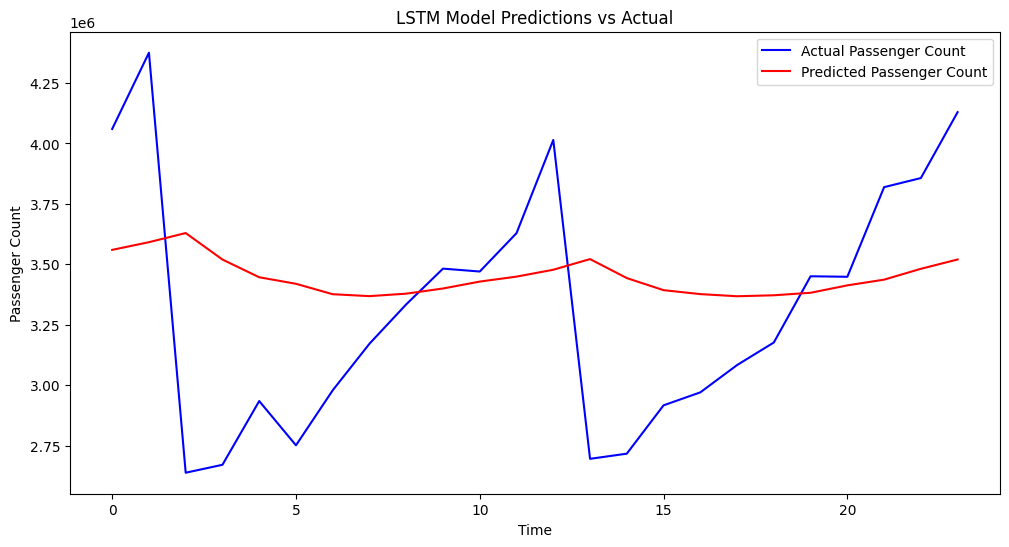

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Inverse transform the predictions to the original scale (if you scaled your data)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Passenger Count', color='blue')
plt.plot(y_pred_original, label='Predicted Passenger Count', color='red')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


real time prediction

In [ ]:
# Step 1: Ensure the model is trained first
# Check if the model is already trained (this should happen before prediction)
if not hasattr(model, 'history_'):
    print("Model is not trained yet. Please train the model first.")
    model.fit(X_train, y_train, epochs=20, batch_size=32)  # Training step with your training data

# Step 2: Prepare the input data for today (the latest data point)
last_known_value = time_series_data['adjusted_passenger_count'].iloc[-1]

# Scale the last known value as per the model's requirement
last_known_value_scaled = scaler.transform([[last_known_value]])

# Step 3: Create the input sequence for prediction (use the last 12 months' data)
recent_data = scaled_values[-sequence_length:]  # Use the last 12 months of data
X_real_time = recent_data.reshape(1, sequence_length, 1)  # Reshape for the model's input

# Step 4: Make the prediction for today
prediction_real_time = model.predict(X_real_time)

# Inverse transform the prediction to original scale
prediction_real_time_original = scaler.inverse_transform(prediction_real_time)

print(f"Predicted Passenger Count for Today: {prediction_real_time_original[0][0]}")

# Step 5: Predict for the next month (next month's passenger count)
future_sequence = scaled_values[-sequence_length:]  # Use the most recent 12 months
future_input = future_sequence.reshape(1, sequence_length, 1)  # Reshape for model input

# Predict for the next month
future_prediction = model.predict(future_input)

# Inverse transform the prediction to original scale
future_prediction_original = scaler.inverse_transform(future_prediction)

print(f"Predicted Passenger Count for Next Month: {future_prediction_original[0][0]}")


Predicted Passenger Count for Today: 3494205.75
Predicted Passenger Count for Next Month: 3494205.75
